## 1. 필요한 패키지 로드

In [116]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import glob
from sklearn.preprocessing import OneHotEncoder
import random

## 2. 파일 경로 지정

In [117]:
path = 'C:/Users/user/Desktop/16017005/Airline'

In [118]:
import os
os.listdir(path)

['.ipynb_checkpoints',
 'Airline.csv',
 'Airline_Experiment(EDA).ipynb',
 'Airline_Experiment.ipynb',
 'Airline_Experiment_DataModeling(Categorical).ipynb',
 'Airline_Experiment_DataModeling(Numerical, Pycaret).ipynb',
 'Airline_Experiment_DataModeling(Numerical, Sklearn, Optuna).ipynb',
 'Airline_revised.csv',
 'Airline_revised_Numerical.csv',
 'catboost_info',
 'logs.log',
 'optuna_contour.jpg',
 'optuna_coordinate.jpg',
 'optuna_optimization_history_plot.jpg',
 'optuna_parameter_importance.jpg',
 'problem.txt',
 'Untitled.ipynb']

In [119]:
data = pd.read_csv(path+'/Airline.csv' ,engine='python',encoding='CP949',index_col = 0) 
# https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction 다운로드 주소

## 3. 데이터 확인

In [120]:
pd.set_option('display.max_columns', None) ## 모든 열을 출력한다
data

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [121]:
data.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


## 4. 결측값 확인

<AxesSubplot:>

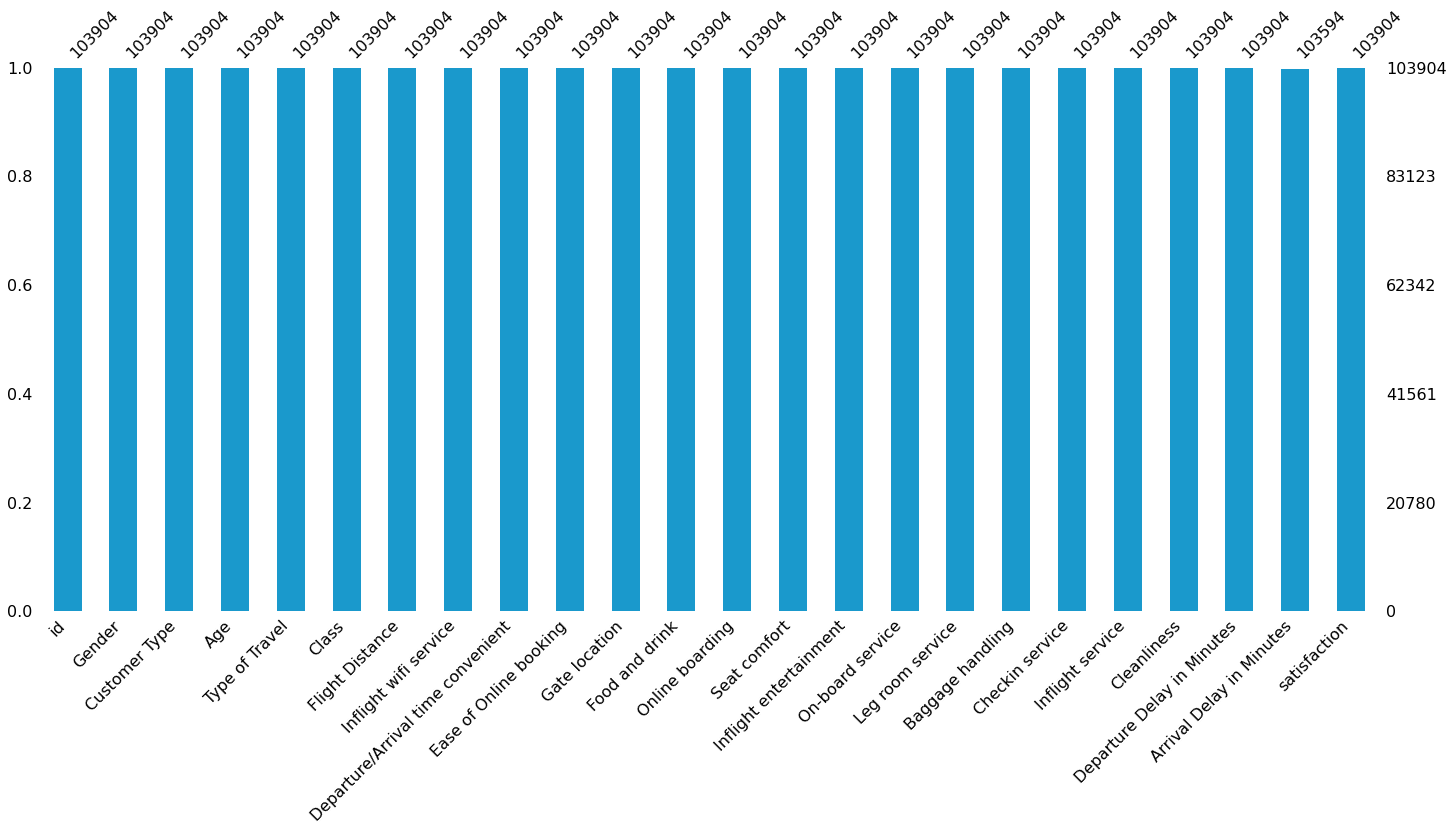

In [122]:
import missingno as msno
msno.bar(df=data.iloc[:, :], color=(0.1, 0.6, 0.8))

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [124]:
data.isnull().any()

id                                   False
Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Inflight service                     False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Delay in Minutes              True
satisfactio

##### Arrival Delay in Minutes 변수에 결측값이 있음을 확인

## 5. 결측값이 들어가 있는 행 삭제

In [125]:
data2 = data.dropna()

In [126]:
data2.isnull().any()

id                                   False
Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Inflight service                     False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Delay in Minutes             False
satisfactio

In [127]:
data2

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [128]:
data2 = data2.iloc[:,1:] #id 칼럼 삭제

In [129]:
data2

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


## 6. 상관계수 plot

In [130]:
from scipy.stats import pearsonr
def pearsonr_co(x,y):
        return pearsonr(x,y)[0]
def pearsonr_pval(x,y):
        return pearsonr(x,y)[1]

In [131]:
co = data2.corr(method=pearsonr_co) #피어슨 상관계수
co

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.099838,0.017470,0.038038,0.024461,-0.001558,0.022920,0.208681,0.160302,0.076380,0.057123,0.040498,-0.047619,0.035003,-0.049899,0.053493,-0.010150,-0.012147
Flight Distance,0.099838,1.000000,0.007050,-0.019908,0.065697,0.004732,0.056957,0.215191,0.157517,0.128645,0.109540,0.133839,0.063222,0.073224,0.057430,0.093121,0.001906,-0.002426
Inflight wifi service,0.017470,0.007050,1.000000,0.343758,0.715848,0.336127,0.134603,0.457002,0.122617,0.209513,0.121484,0.160485,0.121060,0.043178,0.110626,0.132652,-0.017451,-0.019095
Departure/Arrival time convenient,0.038038,-0.019908,0.343758,1.000000,0.437021,0.444601,0.005189,0.069990,0.011416,-0.004683,0.068604,0.012461,0.071901,0.093329,0.073227,0.014337,0.000791,-0.000864
Ease of Online booking,0.024461,0.065697,0.715848,0.437021,1.000000,0.458746,0.031940,0.404093,0.030021,0.047185,0.038759,0.107431,0.038851,0.010957,0.035330,0.016192,-0.006292,-0.007984
Gate location,-0.001558,0.004732,0.336127,0.444601,0.458746,1.000000,-0.001170,0.001451,0.003383,0.003564,-0.028532,-0.005868,0.002421,-0.035451,0.001742,-0.004015,0.005533,0.005143
Food and drink,0.022920,0.056957,0.134603,0.005189,0.031940,-0.001170,1.000000,0.234492,0.574561,0.622374,0.058999,0.032415,0.034811,0.087055,0.034077,0.657648,-0.029983,-0.032524
Online boarding,0.208681,0.215191,0.457002,0.069990,0.404093,0.001451,0.234492,1.000000,0.420067,0.285194,0.155345,0.123780,0.083299,0.204208,0.074390,0.331498,-0.018515,-0.021949
Seat comfort,0.160302,0.157517,0.122617,0.011416,0.030021,0.003383,0.574561,0.420067,1.000000,0.610614,0.132030,0.105447,0.074553,0.191545,0.069193,0.678478,-0.027323,-0.029900
Inflight entertainment,0.076380,0.128645,0.209513,-0.004683,0.047185,0.003564,0.622374,0.285194,0.610614,1.000000,0.420352,0.299850,0.378361,0.120812,0.405247,0.691735,-0.027691,-0.030703


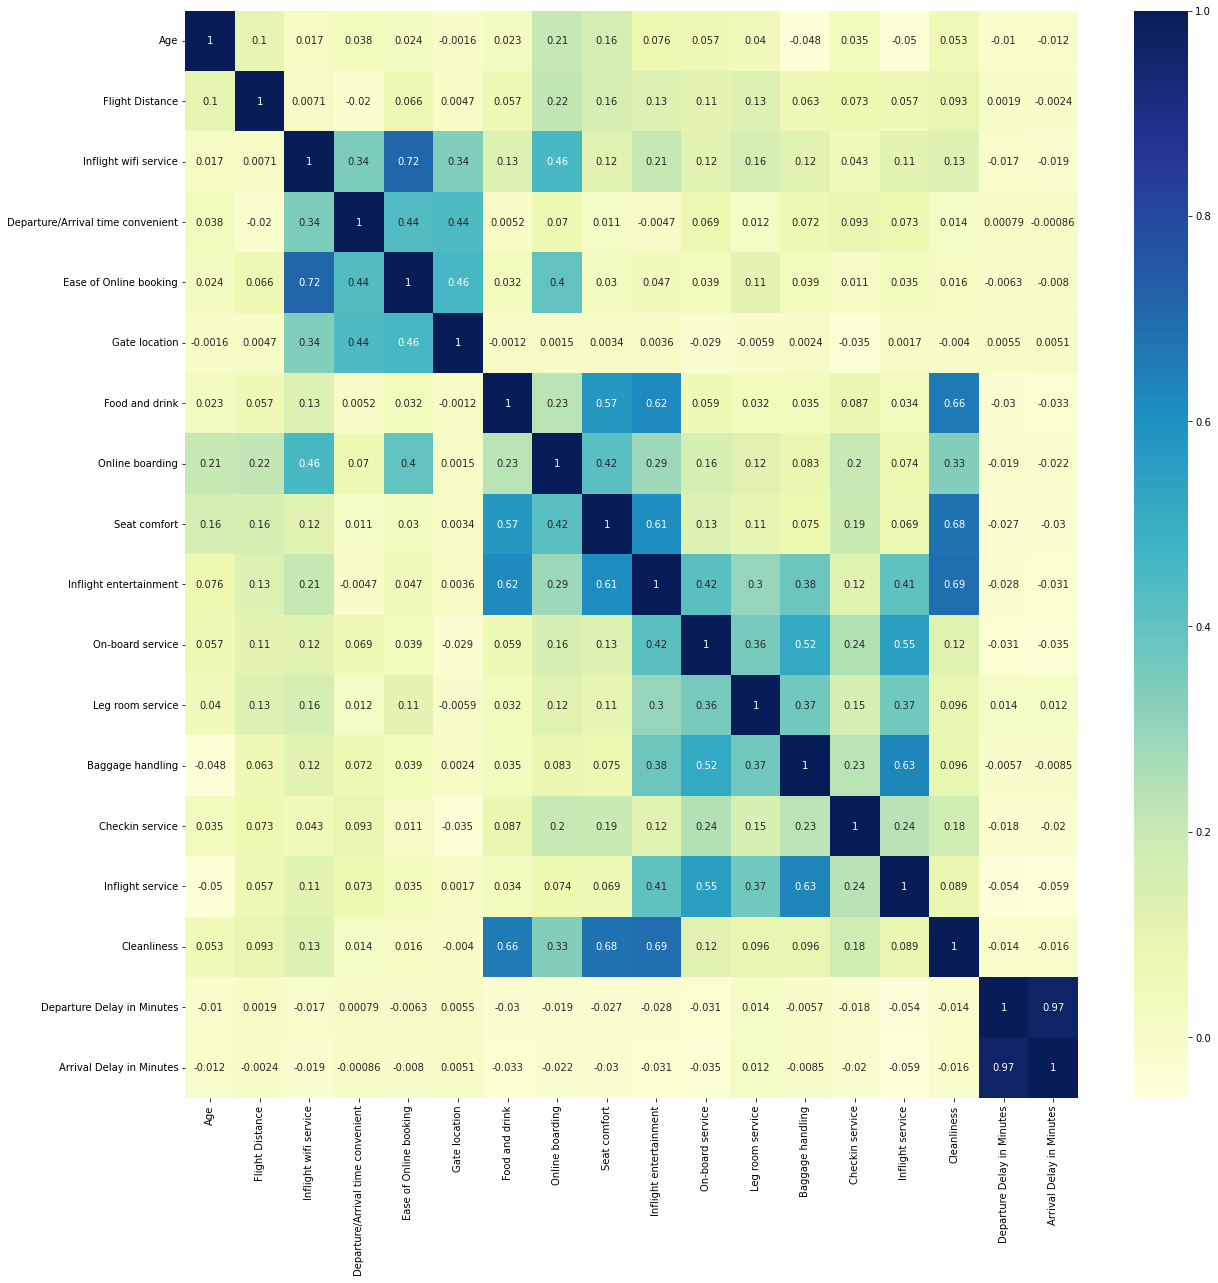

In [132]:
plt.figure(figsize=(20,20))
dataplot = sns.heatmap(co, cmap="YlGnBu", annot=True) #피어슨 상관계수

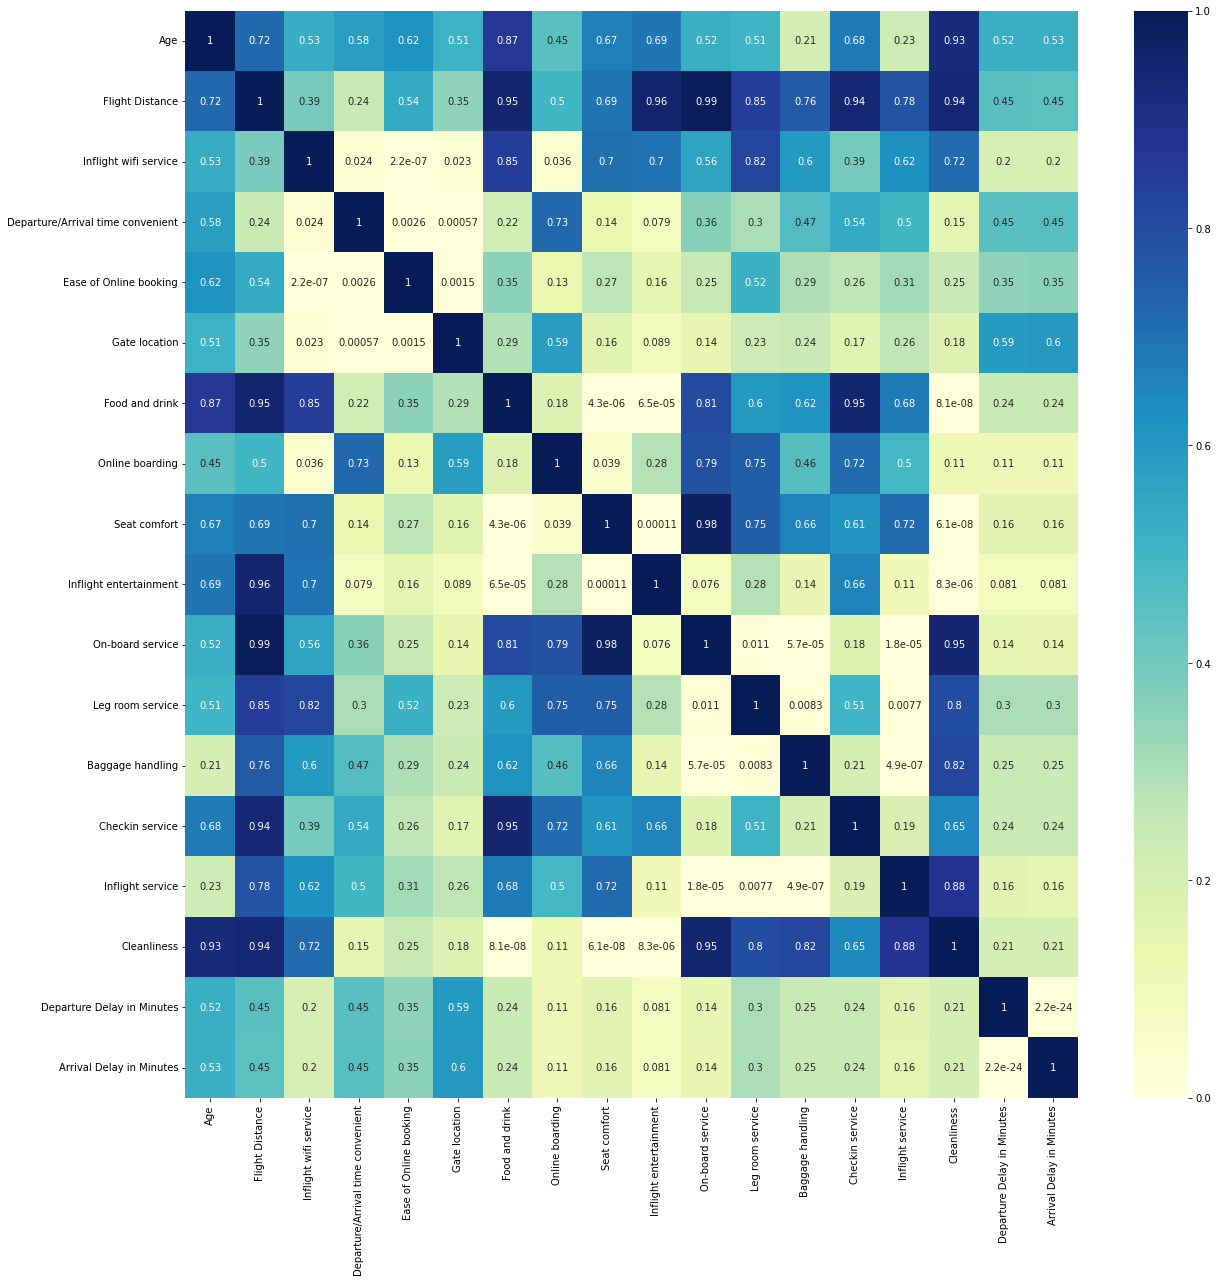

In [133]:
plt.figure(figsize=(20,20))
pv = co.corr(method=pearsonr_pval)
dataplot = sns.heatmap(pv, cmap="YlGnBu", annot=True) #피어슨 상관계수 p-value

## 7. 변수들의 분포 확인

In [134]:
pd.value_counts(data2['Gender']).sort_index() 

Female    52576
Male      51018
Name: Gender, dtype: int64

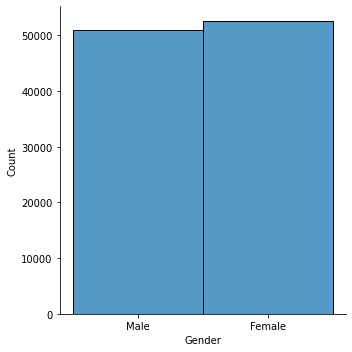

In [135]:
sns.displot(data2['Gender'])

In [136]:
pd.value_counts(data2['Age']).sort_index()

7     560
8     637
9     687
10    681
11    672
     ... 
77     87
78     33
79     42
80     78
85     17
Name: Age, Length: 75, dtype: int64

<AxesSubplot:ylabel='Age'>

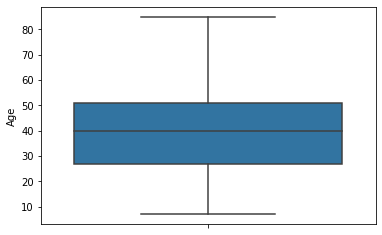

In [137]:
#rcParams['figure.figsize'] = 4,6
fig, ax = plt.subplots()
sns.boxplot(y= data2['Age'])

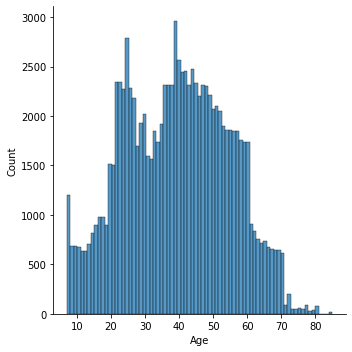

In [138]:
sns.displot(data2['Age'])

In [139]:
pd.value_counts(data2['Customer Type']).sort_index()

Loyal Customer       84662
disloyal Customer    18932
Name: Customer Type, dtype: int64

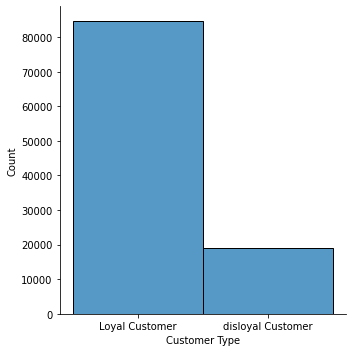

In [140]:
sns.displot(data2['Customer Type'])

In [141]:
pd.value_counts(data2['Type of Travel']).sort_index()

Business travel    71465
Personal Travel    32129
Name: Type of Travel, dtype: int64

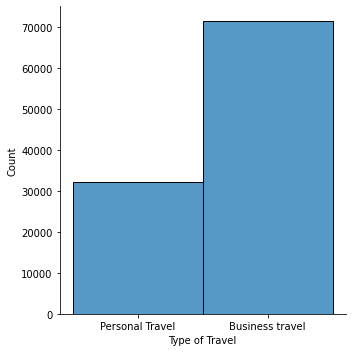

In [142]:
sns.displot(data2['Type of Travel'])

In [143]:
pd.value_counts(data2['Class']).sort_index()

Business    49533
Eco         46593
Eco Plus     7468
Name: Class, dtype: int64

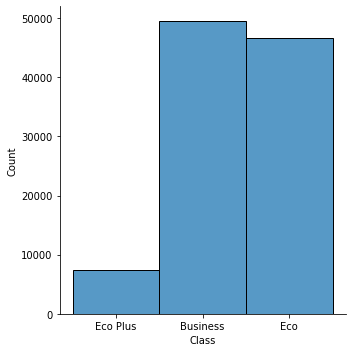

In [144]:
sns.displot(data2['Class'])

In [145]:
pd.value_counts(data2['Flight Distance']).sort_index()

31        8
56        8
67      128
73       59
74       30
       ... 
4243     18
4502     10
4817      5
4963     13
4983     12
Name: Flight Distance, Length: 3802, dtype: int64

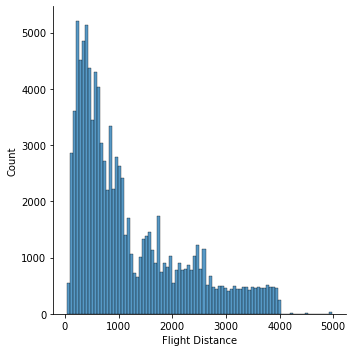

In [146]:
sns.displot(data2['Flight Distance'])

<AxesSubplot:ylabel='Flight Distance'>

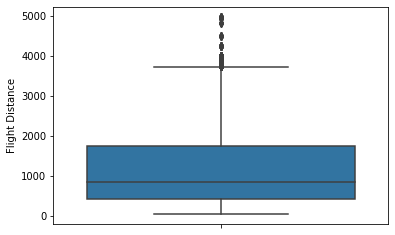

In [147]:
fig, ax = plt.subplots()
sns.boxplot(y=data2['Flight Distance'])

In [148]:
data2['Flight Distance'].describe()

count    103594.000000
mean       1189.325202
std         997.297235
min          31.000000
25%         414.000000
50%         842.000000
75%        1743.000000
max        4983.000000
Name: Flight Distance, dtype: float64

In [149]:
def draw_comparative_bar_plot(satisfied_column, dissatisfied_column, **kwargs):
    pd.concat(
        [
            satisfied_column.value_counts(), 
            dissatisfied_column.value_counts()
        ],
        axis=1, 
        ignore_index=True
    ) \
    .rename({0: 'satisfied', 1: 'dissatisfied'}, axis=1) \
    .plot(kind='bar', **kwargs)

In [150]:
satisfied = data2[data2['satisfaction'] == 'satisfied']
dissatisfied = data2[data2['satisfaction'] == 'neutral or dissatisfied']
# 결과변수에 따른 이진분류

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

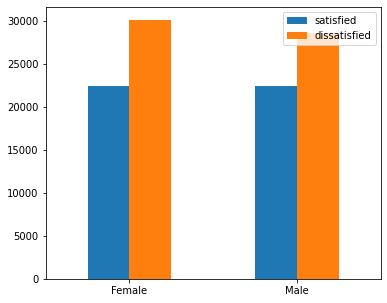

In [151]:
draw_comparative_bar_plot(satisfied['Gender'], dissatisfied['Gender'], figsize=(6, 5))
plt.xticks(rotation =0)

(array([0, 1]),
 [Text(0, 0, 'Loyal Customer'), Text(1, 0, 'disloyal Customer')])

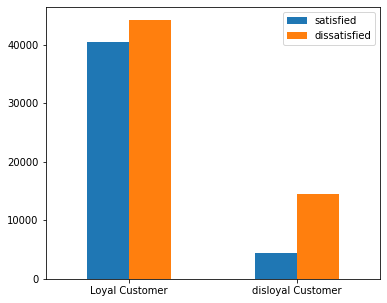

In [152]:
draw_comparative_bar_plot(satisfied['Customer Type'], dissatisfied['Customer Type'],  figsize=(6, 5))
plt.xticks(rotation =0)

(array([0, 1]), [Text(0, 0, 'Business travel'), Text(1, 0, 'Personal Travel')])

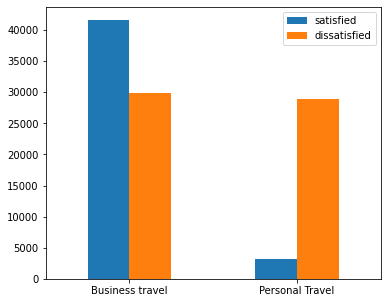

In [153]:
draw_comparative_bar_plot(satisfied['Type of Travel'], dissatisfied['Type of Travel'], figsize=(6, 5))
plt.xticks(rotation =0)

(array([0, 1, 2]),
 [Text(0, 0, 'Business'), Text(1, 0, 'Eco'), Text(2, 0, 'Eco Plus')])

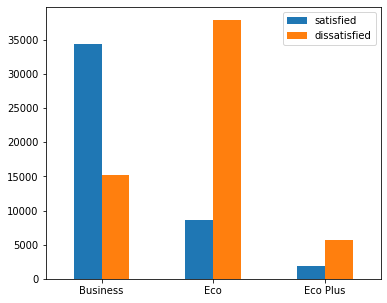

In [154]:
draw_comparative_bar_plot(satisfied['Class'], dissatisfied['Class'], figsize=(6, 5))
plt.xticks(rotation =0)

## 7-1. 5점제 리커트척도 변수

In [155]:
pd.value_counts(data2['Inflight wifi service']).sort_index()

0     3096
1    17781
2    25755
3    25789
4    19737
5    11436
Name: Inflight wifi service, dtype: int64

In [156]:
pd.value_counts(data2['Departure/Arrival time convenient']).sort_index()

0     5290
1    15452
2    17142
3    17903
4    25474
5    22333
Name: Departure/Arrival time convenient, dtype: int64

In [157]:
pd.value_counts(data2['Ease of Online booking']).sort_index()

0     4473
1    17466
2    23962
3    24370
4    19508
5    13815
Name: Ease of Online booking, dtype: int64

In [158]:
pd.value_counts(data2['Gate location']).sort_index()

0        1
1    17511
2    19396
3    28489
4    24353
5    13844
Name: Gate location, dtype: int64

In [159]:
pd.value_counts(data2['Food and drink']).sort_index()

0      105
1    12800
2    21918
3    22238
4    24294
5    22239
Name: Food and drink, dtype: int64

In [160]:
pd.value_counts(data2['Online boarding']).sort_index()

0     2420
1    10658
2    17449
3    21744
4    30671
5    20652
Name: Online boarding, dtype: int64

In [161]:
pd.value_counts(data2['Seat comfort']).sort_index()

0        1
1    12031
2    14846
3    18641
4    31682
5    26393
Name: Seat comfort, dtype: int64

In [162]:
pd.value_counts(data2['Inflight entertainment']).sort_index()

0       14
1    12441
2    17579
3    19080
4    29335
5    25145
Name: Inflight entertainment, dtype: int64

In [163]:
pd.value_counts(data2['On-board service']).sort_index()

0        3
1    11832
2    14632
3    22770
4    30773
5    23584
Name: On-board service, dtype: int64

In [164]:
pd.value_counts(data2['Leg room service']).sort_index()

0      470
1    10310
2    19469
3    20042
4    28704
5    24599
Name: Leg room service, dtype: int64

In [165]:
pd.value_counts(data2['Baggage handling']).sort_index()

1     7223
2    11483
3    20567
4    37274
5    27047
Name: Baggage handling, dtype: int64

In [166]:
pd.value_counts(data2['Checkin service']).sort_index()

0        1
1    12852
2    12854
3    28356
4    28975
5    20556
Name: Checkin service, dtype: int64

In [167]:
pd.value_counts(data2['Inflight service']).sort_index()

0        3
1     7063
2    11414
3    20227
4    37846
5    27041
Name: Inflight service, dtype: int64

In [168]:
pd.value_counts(data2['Cleanliness']).sort_index()

0       12
1    13276
2    16081
3    24506
4    27100
5    22619
Name: Cleanliness, dtype: int64

In [169]:
data_likert = data2.iloc[:, 6:20]
data_likert

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,2,1,2,3,2,2,2,2,3,1,4,2,3,2
103900,4,4,4,4,2,4,5,5,5,5,5,5,5,4
103901,1,1,1,3,4,1,5,4,3,2,4,5,5,4
103902,1,1,1,5,1,1,1,1,4,5,1,5,4,1


## 8.크론바하 알파 (내적일관성)

In [170]:
import pingouin
print(pingouin.cronbach_alpha(data=data_likert)) #5점제 척도 크론바하 알파값

(0.7724106096255079, array([0.77 , 0.774]))


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

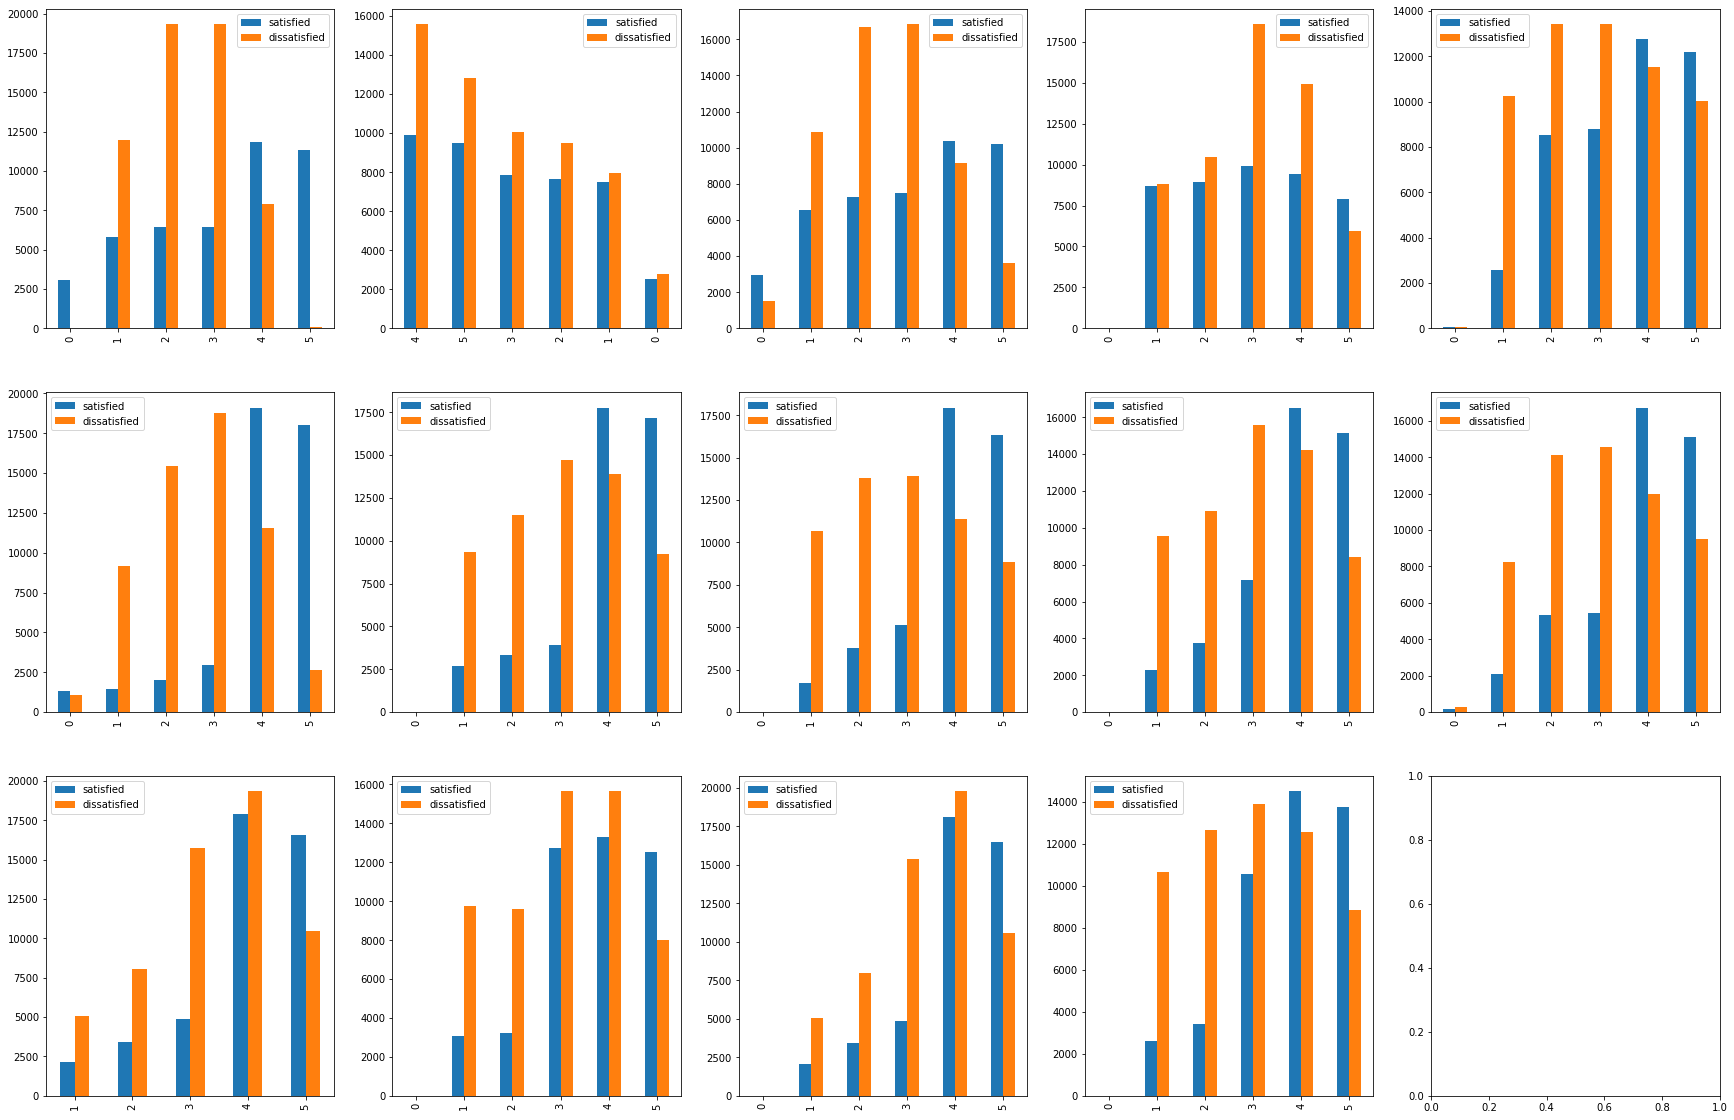

In [171]:
fig, ax = plt.subplots(nrows=3, ncols=5)
ax = ax.ravel()
draw_comparative_bar_plot(satisfied['Inflight wifi service'], dissatisfied['Inflight wifi service'], ax=ax[0], figsize=(30, 20))
plt.xticks(rotation =0)
draw_comparative_bar_plot(satisfied['Departure/Arrival time convenient'], dissatisfied['Departure/Arrival time convenient'], ax=ax[1], figsize=(30, 20))
plt.xticks(rotation =0)
draw_comparative_bar_plot(satisfied['Ease of Online booking'], dissatisfied['Ease of Online booking'], ax=ax[2], figsize=(30, 20))
plt.xticks(rotation =0)
draw_comparative_bar_plot(satisfied['Gate location'], dissatisfied['Gate location'], ax=ax[3], figsize=(30, 20))
plt.xticks(rotation =0)
draw_comparative_bar_plot(satisfied['Food and drink'], dissatisfied['Food and drink'], ax=ax[4], figsize=(30, 20))
plt.xticks(rotation =0)
draw_comparative_bar_plot(satisfied['Online boarding'], dissatisfied['Online boarding'], ax=ax[5], figsize=(30, 20))
plt.xticks(rotation =0)
draw_comparative_bar_plot(satisfied['Seat comfort'], dissatisfied['Seat comfort'], ax=ax[6], figsize=(30, 20))
plt.xticks(rotation =0)
draw_comparative_bar_plot(satisfied['Inflight entertainment'], dissatisfied['Inflight entertainment'], ax=ax[7], figsize=(30, 20))
plt.xticks(rotation =0)
draw_comparative_bar_plot(satisfied['On-board service'], dissatisfied['On-board service'], ax=ax[8], figsize=(30, 20))
plt.xticks(rotation =0)
draw_comparative_bar_plot(satisfied['Leg room service'], dissatisfied['Leg room service'], ax=ax[9], figsize=(30, 20))
plt.xticks(rotation =0)
draw_comparative_bar_plot(satisfied['Baggage handling'], dissatisfied['Baggage handling'], ax=ax[10], figsize=(30, 20))
plt.xticks(rotation =0)
draw_comparative_bar_plot(satisfied['Checkin service'], dissatisfied['Checkin service'], ax=ax[11], figsize=(30, 20))
plt.xticks(rotation =0)
draw_comparative_bar_plot(satisfied['Inflight service'], dissatisfied['Inflight service'], ax=ax[12], figsize=(30, 20))
plt.xticks(rotation =0)
draw_comparative_bar_plot(satisfied['Cleanliness'], dissatisfied['Cleanliness'], ax=ax[13], figsize=(30, 20))
plt.xticks(rotation =0)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '4'),
  Text(1, 0, '5'),
  Text(2, 0, '3'),
  Text(3, 0, '2'),
  Text(4, 0, '1'),
  Text(5, 0, '0')])

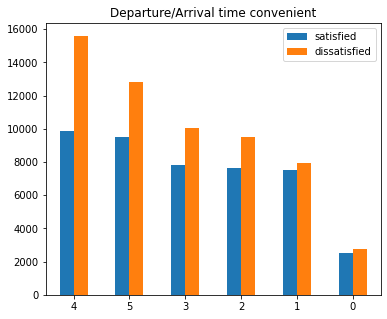

In [172]:
draw_comparative_bar_plot(satisfied['Departure/Arrival time convenient'], dissatisfied['Departure/Arrival time convenient'], figsize=(6, 5))
plt.title('Departure/Arrival time convenient')
plt.xticks(rotation =0)

In [173]:
# 각 문항에 대한 응답 빈도 데이터
frequencies = {}       
for i in ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']:
    frequencies[i] = data2[i].value_counts()

In [174]:
# 행/열 전환
df_freq = pd.DataFrame(frequencies).T
# 빈도를 비율로 변환 (문항별)
df_freq = df_freq.div(df_freq.sum(axis=1), axis=0)*100
# columns 순서 정렬 (응답 1,2,3,4,5 순으로)
df_freq = df_freq.reindex(sorted(df_freq.columns), axis=1)
df_freq

,0,1,2,3,4,5
Inflight wifi service,2.988590,17.164121,24.861478,24.894299,19.052262,11.039249
Departure/Arrival time convenient,5.106473,14.915922,16.547290,17.281889,24.590227,21.558198
Ease of Online booking,4.317818,16.860050,23.130683,23.524528,18.831206,13.335714
Gate location,0.000965,16.903489,18.723092,27.500627,23.508118,13.363708
Food and drink,0.101357,12.355928,21.157596,21.466494,23.451165,21.467460
Online boarding,2.336043,10.288241,16.843640,20.989633,29.606927,19.935518
Seat comfort,0.000965,11.613607,14.330946,17.994285,30.582852,25.477344
Inflight entertainment,0.013514,12.009383,16.969129,18.418055,28.317277,24.272641
On-board service,0.002896,11.421511,14.124370,21.980037,29.705388,22.765797
Leg room service,0.453694,9.952314,18.793559,19.346680,27.708168,23.745584


In [175]:
df_melt = pd.melt(frame=data2,
                  id_vars=None,
                  var_name="문항",
                  value_vars=['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness'],
                  value_name="응답")

<AxesSubplot:>

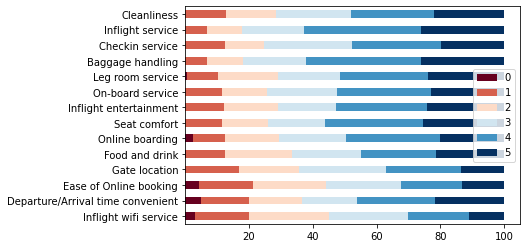

In [176]:
df_freq.plot(kind="barh", stacked=True, colormap='RdBu') #응답 빈도수 그래프

In [177]:
pd.value_counts(data['Departure Delay in Minutes']).sort_index()

0       58668
1        2948
2        2274
3        2009
4        1854
        ...  
933         1
978         1
1017        1
1305        1
1592        1
Name: Departure Delay in Minutes, Length: 446, dtype: int64

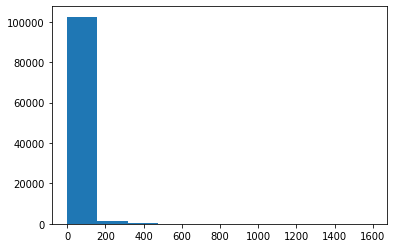

In [178]:
plt.hist(data['Departure Delay in Minutes'])
plt.show()

In [179]:
d_delay = data2.loc[:,['Departure Delay in Minutes']]
print(d_delay.quantile(.25))
print(d_delay.quantile(.5))
print(d_delay.quantile(.75)) #사분위수 범위

Departure Delay in Minutes    0.0
Name: 0.25, dtype: float64
Departure Delay in Minutes    0.0
Name: 0.5, dtype: float64
Departure Delay in Minutes    12.0
Name: 0.75, dtype: float64


In [180]:
d_delay2 = d_delay.replace(0, np.NaN) #0값을 NAN으로 대체 후, 사분위수 범위
d_delay3 = d_delay2.loc[:,['Departure Delay in Minutes']]
print(d_delay3.quantile(.25))
print(d_delay3.quantile(.5))
print(d_delay3.quantile(.75))

Departure Delay in Minutes    6.0
Name: 0.25, dtype: float64
Departure Delay in Minutes    16.0
Name: 0.5, dtype: float64
Departure Delay in Minutes    40.0
Name: 0.75, dtype: float64


In [181]:
a_delay = data2.loc[:,['Arrival Delay in Minutes']]
print(a_delay.quantile(.25))
print(a_delay.quantile(.5))
print(a_delay.quantile(.75))

Arrival Delay in Minutes    0.0
Name: 0.25, dtype: float64
Arrival Delay in Minutes    0.0
Name: 0.5, dtype: float64
Arrival Delay in Minutes    13.0
Name: 0.75, dtype: float64


In [182]:
a_delay2 = a_delay.replace(0, np.NaN)
a_delay3 = a_delay2.loc[:,['Arrival Delay in Minutes']]
print(a_delay3.quantile(.25))
print(a_delay3.quantile(.5))
print(a_delay3.quantile(.75))

Arrival Delay in Minutes    6.0
Name: 0.25, dtype: float64
Arrival Delay in Minutes    17.0
Name: 0.5, dtype: float64
Arrival Delay in Minutes    40.0
Name: 0.75, dtype: float64


Text(0.5, 1.0, 'Departure delay')

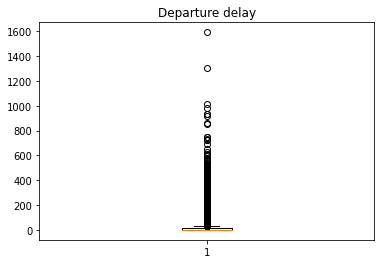

In [183]:
fig, ax = plt.subplots()
plt.boxplot(d_delay)
plt.title('Departure delay')

Text(0.5, 1.0, 'Arrival delay')

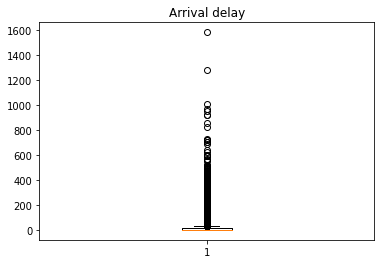

In [184]:
fig, ax = plt.subplots()
plt.boxplot(a_delay)
plt.title('Arrival delay')

In [185]:
pd.value_counts(data2['satisfaction']).sort_index()

neutral or dissatisfied    58697
satisfied                  44897
Name: satisfaction, dtype: int64

In [186]:
data2['f_delay'] = data2['Departure Delay in Minutes'] + data2['Arrival Delay in Minutes'] #이착륙 시간을 더하여 새로운 파생변수 생성

data3 = data2.drop(labels='Departure Delay in Minutes',axis=1)
data4 = data3.drop(labels='Arrival Delay in Minutes',axis=1) #기존 변수는 삭제

In [187]:
data4

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,f_delay
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,neutral or dissatisfied,43.0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,neutral or dissatisfied,7.0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,satisfied,0.0
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,neutral or dissatisfied,20.0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,satisfied,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,neutral or dissatisfied,3.0
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,satisfied,0.0
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,neutral or dissatisfied,21.0
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,neutral or dissatisfied,0.0


In [188]:
data4.loc[data4['f_delay'] == 0, 'Delay'] = 0
data4.loc[data4['f_delay'] > 0, 'Delay'] = 1
data4.loc[data4['f_delay'] > 60, 'Delay'] = 2
# 0분, 1시간 이내, 1시간 이상의 지연시간을 가지는 3가지의 범주로 분리

In [189]:
data4['Delay']

0         1.0
1         1.0
2         0.0
3         1.0
4         0.0
         ... 
103899    1.0
103900    0.0
103901    1.0
103902    0.0
103903    0.0
Name: Delay, Length: 103594, dtype: float64

In [190]:
pd.value_counts(data4['Delay']).sort_index()

0.0    47459
1.0    41916
2.0    14219
Name: Delay, dtype: int64

(array([0, 1, 2]), [Text(0, 0, '0.0'), Text(1, 0, '1.0'), Text(2, 0, '2.0')])

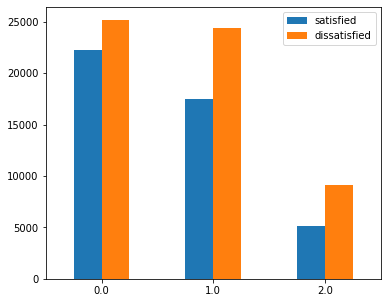

In [191]:
satisfied = data4[data4['satisfaction'] == 'satisfied']
dissatisfied = data4[data4['satisfaction'] == 'neutral or dissatisfied']
draw_comparative_bar_plot(satisfied['Delay'],dissatisfied['Delay'], figsize=(6, 5))
plt.xticks(rotation =0)

In [192]:
data5 = data4.drop(labels='f_delay',axis=1)

In [193]:
data5

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Delay
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,neutral or dissatisfied,1.0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,neutral or dissatisfied,1.0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,satisfied,0.0
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,neutral or dissatisfied,1.0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,satisfied,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,neutral or dissatisfied,1.0
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,satisfied,0.0
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,neutral or dissatisfied,1.0
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,neutral or dissatisfied,0.0


## 9. 해당 범주형 변수 원 핫 인코딩 후, 더미변수 처리

#### 성별, 여행타입, 좌석타입, 고객타입, 만족도

In [194]:
data6 = pd.get_dummies(data = data5, columns = ['Gender'], prefix = 'Gender', drop_first = True)
data7 = pd.get_dummies(data = data6, columns = ['Type of Travel'], prefix = 'Type of Travel', drop_first = True)
data8 = pd.get_dummies(data = data7, columns = ['Class'], prefix = 'Class', drop_first = True)
data9 = pd.get_dummies(data = data8, columns = ['Customer Type'], prefix = 'Customer Type', drop_first = True)
data10 = pd.get_dummies(data = data9, columns = ['satisfaction'], prefix = 'satisfaction', drop_first = True)

In [195]:
data10

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Delay,Gender_Male,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,Customer Type_disloyal Customer,satisfaction_satisfied
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,1.0,1,1,0,1,0,0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1.0,1,0,0,0,1,0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0.0,0,0,0,0,0,1
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,1.0,0,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,1.0,0,0,1,0,1,0
103900,49,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0.0,1,0,0,0,0,1
103901,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,1.0,1,0,0,0,1,0
103902,22,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0.0,0,0,1,0,1,0


In [196]:
#data10.to_csv("Airline_revised.csv", mode = 'w')